In [133]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

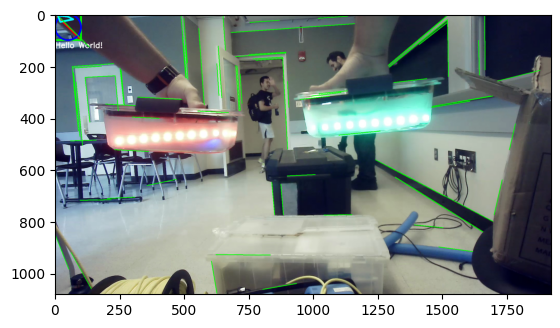

In [134]:
img = cv2.imread('image.jpg')
plt.imshow(img)

cv2.line(img, (0, 0), (100, 100), (255, 0, 0), 5)
cv2.rectangle(img, (0, 0), (100, 100), (0, 255, 0), 5)
cv2.circle(img, (50, 50), 50, (0, 0, 255), 5)

#polygon
pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.polylines(img, [pts], True, (0, 255, 255), 5)

cv2.putText(img, 'Hello World!', (0, 130), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)


#Hough Transform

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray, 50, 150, apertureSize=3) # detect edges
lines = cv2.HoughLinesP(
                edges, #what to draw lines on
                1, #number of lines on each edge
                (np.pi)/180,
                100,
                minLineLength=100, #down goes more frequent, up goes less
                maxLineGap=10, #inverse relation
        ) # detect lines

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0,255, 0), 2)

plt.imshow(img)


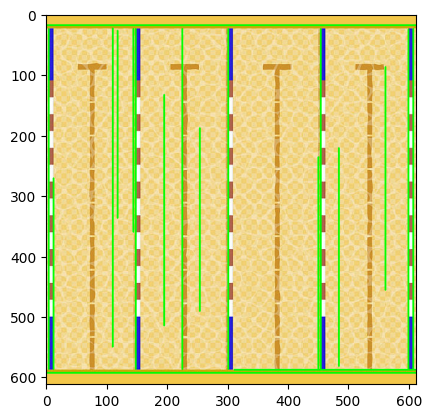

In [135]:
img = cv2.imread('pool.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray, 50, 150, apertureSize=3) # detect edges
lines = cv2.HoughLinesP(
                edges, #what to draw lines on
                1, #number of lines on each edge
                (np.pi)/180,
                100,
                minLineLength=300, #down goes more frequent, up goes less
                maxLineGap=10, #inverse relation
        ) # detect lines

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0,255, 0), 2)

plt.imshow(img)

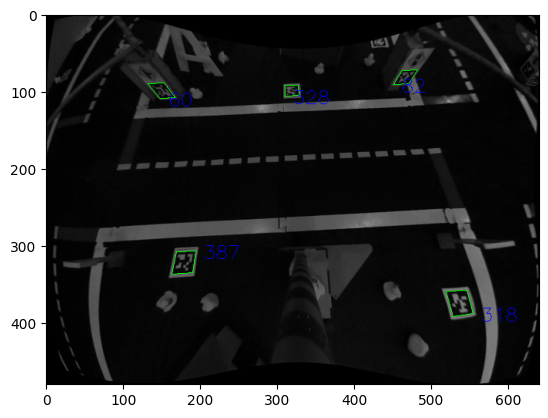

In [136]:
from dt_apriltags import Detector
img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)
tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))
    
plt.imshow(color_img)

In [137]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np

In [138]:

img = cv2.imread('rov_pool.jpg', cv2.IMREAD_GRAYSCALE)


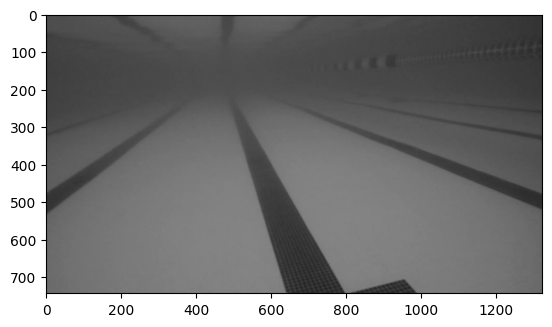

In [139]:

gray = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
plt.imshow(gray)

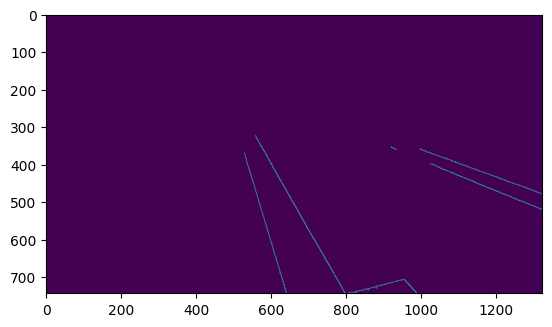

In [140]:

edges = cv2.Canny(gray, 120, 60, apertureSize=3) # detect edges
plt.imshow(edges)

Slope 1: 1.738396624472574
Offset From Horizontal (degrees): 29.91
Slope 2: 3.2990654205607477
Offset From Horizontal (degrees): 16.86


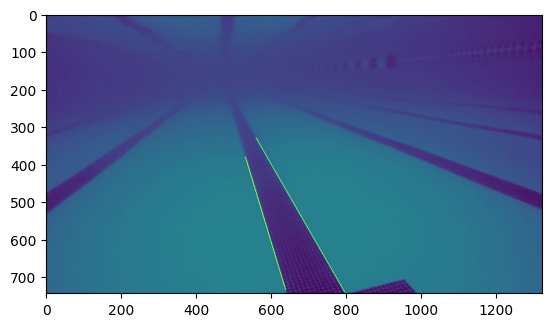

In [141]:

lines = cv2.HoughLinesP(
                edges, #what to draw lines on
                1, #number of lines on each edge
                np.pi/180,
                100,
                minLineLength=350, #down goes more frequent, up goes less
                maxLineGap=100, #inverse relation
        ) # detect lines
i = 1
for line in lines:
    x1, y1, x2, y2 = line[0]
    print("Slope " + str(i) + ": " + str((y2 - y1)/(x2-x1)))
    theta = np.arctan((x2-x1)/(y2-y1))
    theta = np.round(np.degrees(theta), 2)
    print("Offset From Horizontal (degrees): " + str(theta))
    cv2.line(img, (x1, y1), (x2, y2), (255,0, 0), 2)
    i+=1



plt.imshow(img)


In [142]:
def get_slope(line):
    x1, y1, x2, y2 = line[0]
    return (y2 - y1) / (x2 - x1)

    

        


def analyze(img, thresh1, thresh2):
    gray = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(gray, thresh1, thresh2, apertureSize=3)
    lines = cv2.HoughLinesP(
                edges, #what to draw lines on
                1, #number of lines on each edge
                np.pi/180,
                100,
                minLineLength=300, #down goes more frequent, up goes less
                maxLineGap=30, #inverse relation
        ) # detect lines
    #i = 1
    '''
    slopes = []
    for line in lines:
        slope = np.round(get_slope(line), 2)
        if slope not in slopes:
            slopes.append(slope)
            cv2.putText(img, f"slope = {slope}", (x2, y2), cv2.FONT_HERSHEY_DUPLEX, 1, (0,225,0), 3)
            
            theta = np.arctan((x2-x1)/(y2-y1))
            theta = np.round(np.degrees(theta), 2)
            cv2.putText(img, f"angle offset = {theta}", (x1, y1), cv2.FONT_HERSHEY_DUPLEX, 1, (0,225,0), 3)
            cv2.line(img, (x1, y1), (x2, y2), (255,0, 0), 2)
        else:
            continue    
        #i+=1
    plt.imshow(img)
    '''
    
    for line in lines:
        x1, y1, x2, y2 = line[0]
        slope = (y2 - y1)/(x2-x1)

        cv2.putText(img, f"slope = {slope}", (x2, y2), cv2.FONT_HERSHEY_DUPLEX, 1, (0,225,0), 3)
        theta = np.arctan((x2-x1)/(y2-y1))
        theta = np.round(np.degrees(theta), 2)
        cv2.putText(img, f"angle offset = {theta}", (x1, y1), cv2.FONT_HERSHEY_DUPLEX, 1, (0,225,0), 3)
        cv2.line(img, (x1, y1), (x2, y2), (255,0, 0), 2)
    plt.imshow(img)
    

In [143]:
cap = cv2.VideoCapture('AUV_Vid.mkv')
ret, frame = cap.read()

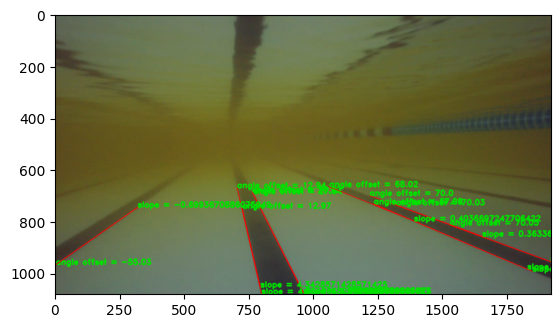

In [144]:

'''
count = 0
frequency = 100 #100 frames
while ret:
    if count % frequency == 0:
        #plt.imshow(cv2.cvtColor(analyze(frame), cv2.COLOR_BGR2RGB))
        try:
            analyze(frame)
        except:
            count += 1
            ret, frame = cap.read()
            continue
        count += 1
        ret, frame = cap.read()
    else:
        ret = False
'''

analyze(frame, 50, 50)